In [16]:
import numpy as np
import pandas as pd
import tensorflow.keras
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import glob
import os

In [5]:
print(os.listdir())

['.ipynb_checkpoints', 'LICENSE', 'papers', 'readme.md', 'Test', 'test-multiple_fruits', 'test.py', 'tf.py', 'Training', 'Untitled.ipynb']


In [15]:
training_fruit_img = []
training_label = []
for dir_path in glob.glob("Training/*"):
    img_label = dir_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        
        image = cv2.imread(image_path,cv2.IMREAD_COLOR)
        image = cv2.resize(image, (64, 64))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        training_fruit_img.append(image)
        training_label.append(img_label)
training_fruit_img = np.array(training_fruit_img)
training_label = np.array(training_label)
len(np.unique(training_label))

131

In [7]:
label_to_id = {v:k for k,v in enumerate(np.unique(training_label)) }
id_to_label = {v:k for k,v in label_to_id.items() }

In [10]:
print(len(training_label))

67692


In [11]:
training_label_id = np.array([label_to_id[i] for i in training_label])
training_label_id

array([  0,   0,   0, ..., 130, 130, 130])

In [12]:
training_fruit_img.shape,training_label_id.shape

((67692, 64, 64, 3), (67692,))

In [13]:
validation_fruit_img=[]
validation_label =[]
for dir_path in glob.glob("Test/*"):
    img_label = dir_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        image = cv2.imread(image_path,cv2.IMREAD_COLOR)
        image = cv2.resize(image, (64, 64))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        validation_fruit_img.append(image)
        validation_label.append(img_label)
validation_fruit_img = np.array(validation_fruit_img)
validation_label = np.array(validation_label)

In [14]:
len(np.unique(validation_label))

131

In [18]:
validation_label_id = np.array([label_to_id[i] for i in validation_label])
validation_label_id

array([  0,   0,   0, ..., 130, 130, 130])

In [19]:
validation_fruit_img.shape,validation_label_id.shape

((22688, 64, 64, 3), (22688,))

In [21]:
X_train,X_test = training_fruit_img,validation_fruit_img
Y_train,Y_test =training_label_id,validation_label_id
X_train = X_train/255
X_test = X_test/255

X_flat_train = X_train.reshape(X_train.shape[0],64*64*3)
X_flat_test = X_test.reshape(X_test.shape[0],64*64*3)

#One Hot Encode the Output
Y_train = tensorflow.keras.utils.to_categorical(Y_train, 131)
Y_test = tensorflow.keras.utils.to_categorical(Y_test, 131)

print('Original Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print('Flattened:', X_flat_train.shape, X_flat_test.shape)

Original Sizes: (67692, 64, 64, 3) (22688, 64, 64, 3) (67692, 131) (22688, 131)
Flattened: (67692, 12288) (22688, 12288)


(64, 64, 3)


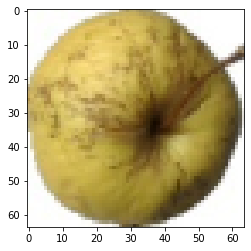

In [22]:
print(X_train[1200].shape)
plt.imshow(X_train[1200])
plt.show()

In [26]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.activations import *
from tensorflow.keras import backend as K

In [29]:
model = Sequential()
model.add(Conv2D(16,(5,5),input_shape=(64,64,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(5,5),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(5,5),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(5,5),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
#model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))
model.add(Dense(131))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 16)        1216      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 64, 64, 16)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        12832     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)       

In [30]:
model.compile(loss='categorical_crossentropy',
             optimizer = Adamax(),
             metrics=['accuracy'])

model.fit(X_train,
          Y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data = (X_test,Y_test)
         )

Train on 67692 samples, validate on 22688 samples
Epoch 1/12
67692/67692 [==============================] - 103s 2ms/sample - loss: 1.8118 - accuracy: 0.5485 - val_loss: 1.9763 - val_accuracy: 0.4651
Epoch 2/12
67692/67692 [==============================] - 70s 1ms/sample - loss: 0.3555 - accuracy: 0.8978 - val_loss: 0.3077 - val_accuracy: 0.9095
Epoch 3/12
67692/67692 [==============================] - 69s 1ms/sample - loss: 0.1585 - accuracy: 0.9547 - val_loss: 0.2366 - val_accuracy: 0.9275
Epoch 4/12
67692/67692 [==============================] - 69s 1ms/sample - loss: 0.0925 - accuracy: 0.9740 - val_loss: 0.1785 - val_accuracy: 0.9474
Epoch 5/12
67692/67692 [==============================] - 69s 1ms/sample - loss: 0.0605 - accuracy: 0.9838 - val_loss: 0.1275 - val_accuracy: 0.9695
Epoch 6/12
67692/67692 [==============================] - 69s 1ms/sample - loss: 0.0455 - accuracy: 0.9874 - val_loss: 0.1036 - val_accuracy: 0.9766
Epoch 7/12
67692/67692 [==============================]

In [20]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import model_from_json
def save_model(model, name):
    # serialize model to JSON
    model_json = model.to_json()
    with open("{}.json".format(name), "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("{}.h5".format(name))
    plot_model(model, "{}.png".format(name))
    print("Saved model to disk")

In [34]:
save_model(model, "PA")

Saved model to disk


In [21]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import model_from_json
def load_model(name):
    # load json and create model
    json_file = open('{}.json'.format(name), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("{}.h5".format(name))
    print("Loaded model from disk")
    return loaded_model

In [10]:
from tensorflow.keras.preprocessing import image
import csv


In [22]:
modelle = load_model("model/PA")
with open("PA/test.csv", 'w', newline='') as f:
    headers = ['Id', 'Category']
    writer = csv.DictWriter(f, fieldnames=headers)
    writer.writeheader()
    file = "banaan-large.jpg"
    image_path = "PA/{}".format(file)
    img = image.load_img(image_path, target_size=(64, 64))
    img = np.expand_dims(img, axis=0)
    result = modelle.predict(img)[0]
    i = np.argmax(result)
    print(i)
    writer.writerow({'Id': file.replace('.jpg',''), 'Category': training_label[i]})

Loaded model from disk


AttributeError: 'numpy.ndarray' object has no attribute 'load_img'